# Emotion in speech

The next dataset contains short speech audio clips in German. 45 files in total.

Each audio clip has two associated values between -1 and 1, one for _arousal_ and one for _valence_, in the corresponding CSV files.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob, os, pickle
from IPython.display import Audio
import scipy.io.wavfile
from ipywidgets import interact
from IPython.display import Audio
import pandas as pd
import seaborn as sns
sns.set(style='ticks', font_scale=1.5)

In [2]:
import librosa # https://github.com/librosa/librosa
import keras

Using TensorFlow backend.


## Data

Download the data from [GitHub](https://github.com/yoavram/SpeechEmotion/archive/master.zip) (data originally from user Theodoros Giannakopoulos' [pyAudioAnalysis repo](https://github.com/tyiannak/pyAudioAnalysis)).
Extract the zip file into the `data` folder.
Now the files are in `data/SpeechEmotion-master/data`.

This cell reads the `csv` files.

In [3]:
valence = pd.read_csv('../data/SpeechEmotion-master/data/valence.csv', header=None).iloc[:,1].values
arousal = pd.read_csv('../data/SpeechEmotion-master/data/arousal.csv', header=None).iloc[:,1].values

The next functions are similar to the ESC-50 session, loading, plotting and plying an audio clip.

In [4]:
audio_fname_template = '../data/SpeechEmotion-master/data/{:02d}.wav'

def load_wave(i):
    fname = audio_fname_template.format(i)
    rate, wave = scipy.io.wavfile.read(fname)
    wave = (wave + 0.5) / (0x7FFF + 0.5)  # convert to float
    wave *= 1.0 / np.max(np.abs(wave)) # normalize
    return wave, rate
wave, rate = load_wave(0)

Arousal: 0.25
Valence: -0.7


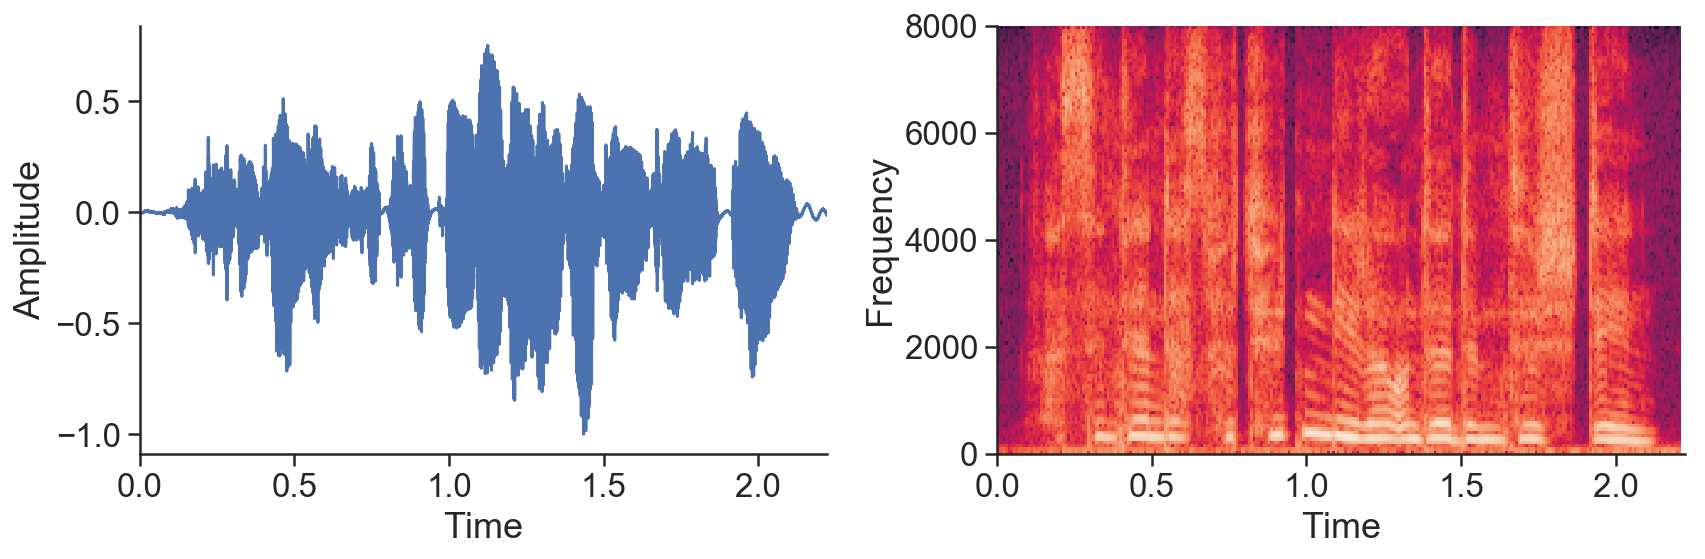

In [5]:
@interact(i=(0, 44))
def play_speech(i):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
    wave, rate = load_wave(i)
    axes[0].plot(np.arange(0, wave.size/rate, 1/rate), wave)
    axes[0].set(xlim=(0, wave.size/rate), xlabel='Time', ylabel='Amplitude')
    f, t, spectrogram, im = axes[1].specgram(wave, Fs=rate)
    axes[1].set(xlim=(0, wave.size/rate), xlabel='Time', ylabel='Frequency')
    sns.despine()
    fig.tight_layout()
    print('Arousal:', arousal[i])
    print('Valence:', valence[i])
    return Audio(wave, rate=rate)

Let's also look at the distribution of arousal and valence values (on the main diagonal) and their joint distributions (on the off-diagonal).

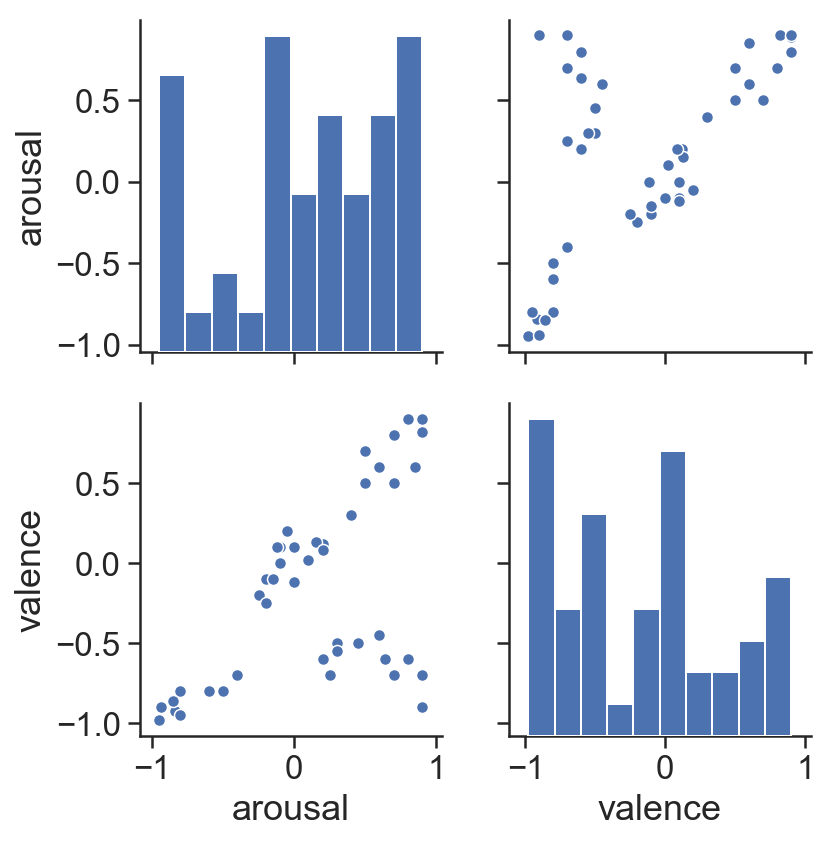

In [7]:
sns.pairplot(pd.DataFrame({'arousal':arousal, 'valence': valence}), height=3, plot_kws=dict(marker='o'));

# Model building and training

We want to train a neural network to predict arousal and valence in speech.
You can reuse code from the [ESC-50 sounds classification example](../audio.ipynb).

Notes:
- here we are doing regression of two dependent variables (arousal and valence) rather than classification of a single variable.
- the sampling rate of the speech files is 16,000 Hz rather than 44,200.
- the audio clips are of variable length; you can solve this by segmenting them to identical lengths, but the code needs to be a bit different than the one we used for ESC-50, as you will get a different number of segments from each clip.
- if you choose to generate the _delta_ feature, you should consider changing the window width.
- there are only 45 files, so consider reducing the size of the network either by removing layers or decreasing the size of the kernels.

The following are the results of the model trained in the [solution](../solutions/audio.ipynb) - try doing something as good or better in terms of the model loss and the fit between predictions and truth.

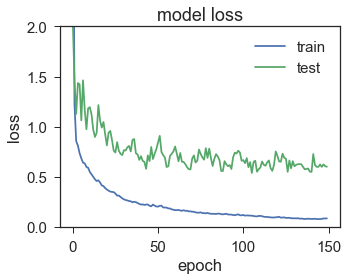

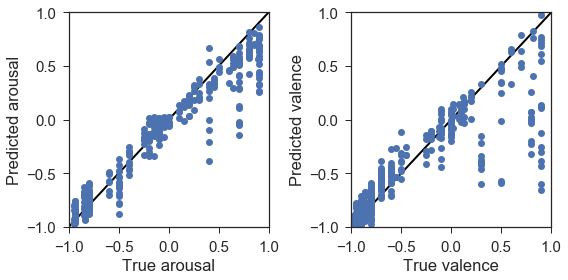